In [1]:
import importlib
import torch
import models
import hotrg_torch
from opt_einsum import contract
importlib.reload(models)
importlib.reload(hotrg_torch)


<module 'hotrg_torch' from 'c:\\Users\\timot\\OneDrive - The Chinese University of Hong Kong\\Desktop\\misc trash\\diff-hotrg\\hotrg_torch.py'>

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
#torch.set_default_dtype(torch.float64)
torch.set_default_device(device)
torch.get_default_device()

device(type='cuda', index=0)

In [ ]:
import numpy as np
Tc = models.Ising2D.Tc
dlnZdT= []
for T in np.linspace(0.8*Tc,1.2*Tc,50):
  with torch.autograd.detect_anomaly():
    temp = torch.Tensor([T]).to(device)
    temp.requires_grad_()
    model = models.Ising2D(temp)
    hotrg = hotrg_torch.HOTRG(model,10)
    hotrg.run(100)
    F = hotrg.get_lnZ()
    F.backward()
    dlnZdT.append(temp.grad)

C:\Users\timot\AppData\Local\Temp\ipykernel_70180\2273115642.py:5: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  with torch.autograd.detect_anomaly():


Renormalizing Ising2D
Current lattice size: 1	Current iterations: 0
Saving checkpoints every 5 steps
Checkpoint will in saved at ./Ising2D-chi10-T_1.81535.pt
Printing logs every 10 steps
Iteration:  0 RG lnZ:  tensor([2.5181], device='cuda:0', grad_fn=<DivBackward0>) Theory lnZ:  tensor([1.1176], device='cuda:0') % Error:  tensor([55.6176], device='cuda:0', grad_fn=<DivBackward0>)
Iteration:  10 RG lnZ:  tensor([1.1183], device='cuda:0', grad_fn=<DivBackward0>) Theory lnZ:  tensor([1.1176], device='cuda:0') % Error:  tensor([0.0605], device='cuda:0', grad_fn=<DivBackward0>)
Iteration:  20 RG lnZ:  tensor([1.1176], device='cuda:0', grad_fn=<DivBackward0>) Theory lnZ:  tensor([1.1176], device='cuda:0') % Error:  tensor([1.0667e-05], device='cuda:0', grad_fn=<DivBackward0>)
Iteration:  30 RG lnZ:  tensor([1.1176], device='cuda:0', grad_fn=<DivBackward0>) Theory lnZ:  tensor([1.1176], device='cuda:0') % Error:  tensor([5.3334e-05], device='cuda:0', grad_fn=<DivBackward0>)
Iteration:  40 RG

KeyboardInterrupt: 

In [ ]:
result = torch.load('./Ising2D-chi10-T_2.14975.pt')

C:\Users\timot\AppData\Local\Temp\ipykernel_29992\2467129691.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  result = torch.load('./Ising2D-chi10-T_2.14975.pt')


In [ ]:
result['']

In [19]:
dlnZdT
E = np.array([val.detach().cpu().item() for val in dlnZdT])
T = np.linspace(0.8*Tc,1.2*Tc,20)
E = T**2 *E

In [20]:
import matplotlib
import matplotlib.pyplot as plt

In [21]:
E

array([-1.85243418, -1.8293062 , -1.80328562, -1.77397469, -1.74086406,
       -1.70326347, -1.6601835 , -1.6100655 , -1.55002701, -1.47265495,
       -1.3558141 , -1.27795803, -1.21695132, -1.16525146, -1.11995633,
       -1.07948786, -1.04285917, -1.00938541, -0.97857217, -0.95004255])

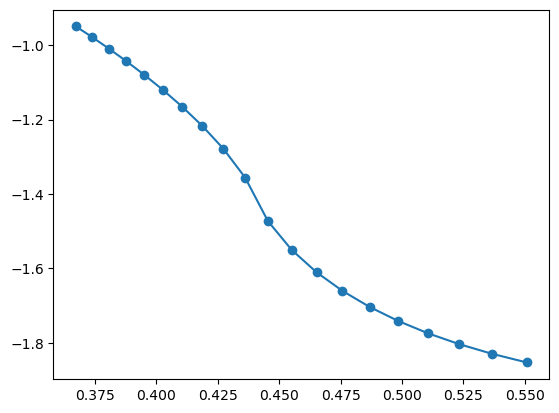

In [24]:
plt.plot(1/T,E,marker='o')